In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import os

In [2]:
# read in excel workbook
mil_spending_full = pd.ExcelFile('data/SIPRI-Milex-data-1949-2016.xlsx')

# get worksheet names
print(mil_spending_full.sheet_names)

#parse out worksheets needed for analysis
Regional_totals = mil_spending_full.parse(1, index_col =0, skiprows = 14, header = 0)
Current_USD = pd.read_excel('SIPRI-Milex-data-1949-2016.xlsx', sheet_name = 5, skiprows = 5, index_col='Country', skip_footer = 9, na_values = [' ','. .','xxx', 'NaN'])
Share_GDP = mil_spending_full.parse('Share of GDP', skiprows = 5, index_col='Country', skip_footer = 8, na_values = [' ','. .','xxx', 'NaN'])
Per_capita = mil_spending_full.parse('Per capita', skiprows = 6, index_col='Country', skip_footer = 7, na_values = [' ','. .','xxx', 'NaN'])


['Front page', 'Regional totals', 'Local currency financial years', 'Local currency calendar years', 'Constant (2015) USD', 'Current USD', 'Share of GDP', 'Per capita', 'Share of Govt. spending', 'Footnotes']


/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [4]:
Current_USD.head() #test to make sure the data read in correctly

,Notes,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3945.815125,5172.336907,5280.588156,5671.309117,8652.237040,9326.287144,10161.588239,9724.379972,10412.714003,10217.08170
Libya,‡ ¶ 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,639.137046,1100.068652,NaN,NaN,NaN,2987.413408,3964.690154,3755.658598,NaN,NaN
Morocco,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.714286,35.40198,...,2408.350250,2944.958473,3055.069442,3160.804832,3342.698956,3402.700836,4065.552317,4048.610929,3268.363376,3327.03189


In [5]:
# pick columns and years needed for analysis, 1993-2016 to eliminate the USSR from consideration

Current_USD_years = Current_USD.iloc[:,45:69]
#drop NAs
Current_USD_years.dropna(how='any', inplace = True)

In [6]:
# create a new column for the average
Current_USD_years['Spending Average']= Current_USD_years.mean(axis=1)

    

In [7]:
#Military Spending of Top Ten Countries
sort_Current_USD =Current_USD_years.sort_values(by='Spending Average',ascending=False)
topten_Current_USD=sort_Current_USD.head(10)
topten_Current_USD

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Spending Average
Country,,,,,,,,,,,,,,,,,,,,,
USA,297637.000000,288059.000000,278856.000000,271417.000000,276325.000000,274278.000000,280969.000000,301697.000000,312743.000000,356720.000000,...,621131.000000,668567.000000,698180.000000,711338.000000,684780.000000,639704.000000,609914.000000,596009.639000,611186.443000,468641.003417
"China, P.R.",12577.165930,10050.586559,12606.229599,14563.240390,16104.915232,17527.989869,21027.341242,22929.764607,27875.387284,32137.735649,...,86362.099113,105644.214526,115711.781066,137967.304294,157390.377246,179880.451358,200772.203840,214093.069946,215175.930112,76881.030797
France,42590.872342,44392.512323,47768.110000,46403.438584,41308.251985,40041.139680,38897.240331,33814.262023,33276.659717,36403.933933,...,66009.448127,66884.028879,61781.748108,64600.927220,60035.153811,62417.099178,63613.569143,55342.131529,55745.475500,51177.909643
UK,34085.881363,34493.524143,34247.823782,34490.949485,35674.878363,36866.288852,36453.353008,35254.814799,35331.927360,39659.529123,...,65619.450480,57914.627858,58082.848795,60270.435687,58495.656721,56861.759588,59182.858554,53862.185493,48252.518238,48109.800264
Japan,41353.936222,45285.594083,49961.673237,44047.104680,40634.840608,37849.012643,43122.898505,45509.673827,40757.967234,39333.708170,...,46361.468280,51465.158208,54655.450735,60762.213841,60011.530195,49023.932407,46634.511062,41103.226466,46126.327551,45758.727776
Germany,37215.052110,36330.284517,41158.705095,38989.886649,33217.573925,33146.457057,32604.005638,28149.990787,27425.257940,29333.207849,...,48081.444318,47470.073335,46255.521194,48140.347951,46470.870905,45930.540563,46102.673010,39812.576245,41067.464816,39110.953747
Russian Federation,7766.720078,13547.871733,12741.629470,15826.340652,17577.353181,7955.730401,6469.035211,9228.204144,11683.151345,13943.825063,...,56183.785393,51532.116798,58720.227609,70237.523951,81469.399931,88352.896464,84696.504653,66418.708184,69245.309461,36954.801678
Saudi Arabia,16451.200000,14279.733333,13200.266667,13340.000000,18126.666667,20861.600000,18320.000000,19964.266667,21026.666667,18501.866667,...,38222.933333,41267.200000,45244.533333,48530.933333,56497.866667,67020.000000,80762.400000,87185.866667,63672.800000,34690.696901
Italy,20565.968322,20363.538987,19375.257051,23442.084366,22723.903335,23478.157105,23693.863484,22411.184817,22006.067060,24363.088796,...,41243.637163,38301.407390,36032.289466,38129.991451,33732.753946,33891.913925,31572.443580,25294.630143,27933.794293,28992.068338


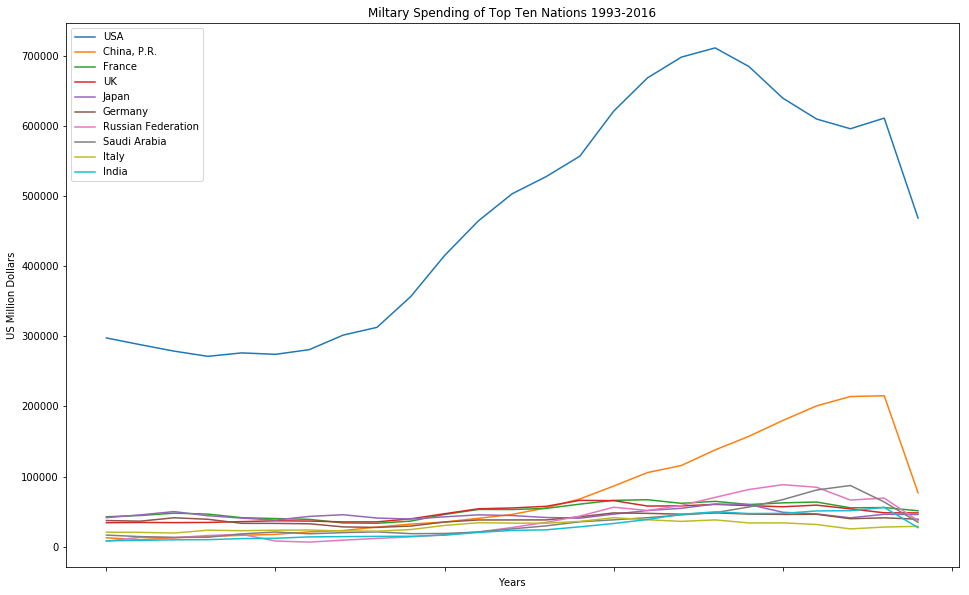

In [8]:
#Plot Top Ten Countries
topten_Current_USD.iloc[:,0:27].T.plot(kind='line',figsize=(16,10))
plt.legend(loc='best') 
plt.xlabel('Years')
plt.ylabel('US Million Dollars')
plt.title('Miltary Spending of Top Ten Nations 1993-2016')
plt.show()

In [9]:
##Compare Top Ten Country's Spending to Their Respective GDP
Share_GDP_Indexed = Share_GDP.iloc[:,45:69]
Share_GDP_Indexed.dropna(how='any', inplace = True)
#Pull out top ten countries
topten_Share_GDP=Share_GDP_Indexed.filter(items=['USA','China, P.R.', 'Russian Federation', 'France', 'UK', 'Saudi Arabia','Japan','Germany','India','Italy'],axis=0)
#top_ten_with_mean = topten_Share_GDP.copy(deep=True)
topten_Share_GDP['Share GDP Average']=topten_Share_GDP.mean(axis=1)
topten_Share_GDP=topten_Share_GDP*100

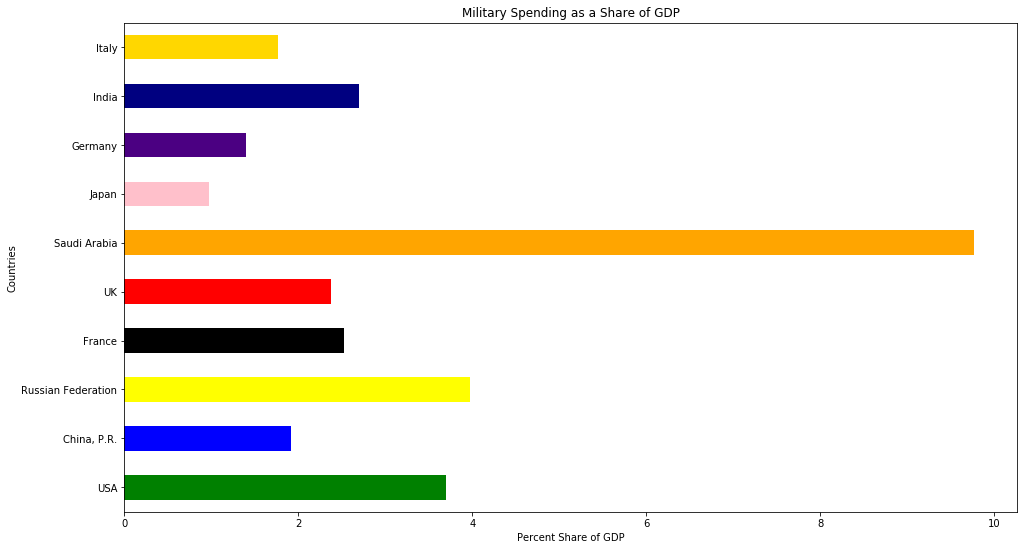

In [10]:
##Compare data to country's GDP
colors1 = ['green','blue','yellow','black','red', 'orange', 'pink', 'indigo', 'navy', 'gold']
topten_Share_GDP['Share GDP Average'].plot(kind = 'barh', figsize=(16,9), color = colors1)
plt.ylabel('Countries')
plt.xlabel('Percent Share of GDP')
plt.title('Military Spending as a Share of GDP')
plt.show()

In [13]:
##Compare the data to the overall military spending of the all 10+ countries

#Add sum column to CurrentUSD
total_CurrentUSD = topten_Current_USD.drop('Spending Average', axis=1)
total_CurrentUSD['Sum Current USD'] = topten_Current_USD.sum(axis=1)
justtotal_CurrentUSD = total_CurrentUSD.filter(items=['Sum Current USD'], axis=1)
pd.set_option('float_format', '{:f}'.format)
#justtotal_CurrentUSD

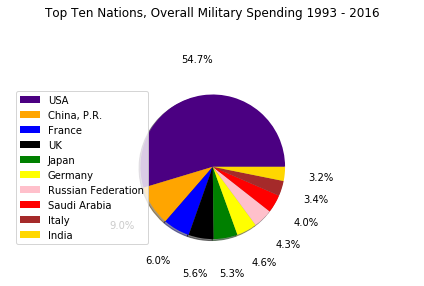

In [14]:
#Let's visulize total spending as a pie chart
sizes = justtotal_CurrentUSD['Sum Current USD']
labels = justtotal_CurrentUSD.index 
colors = ['indigo','orange','blue','black','green', 'yellow', 'pink', 'red', 'brown', 'gold']
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(sizes, explode = explode, colors=colors, autopct='%1.1f%%', shadow = True, pctdistance=1.5)
plt.legend(labels, loc="upper left")
plt.axis('equal')
plt.title('Top Ten Nations, Overall Military Spending 1993 - 2016', y=1.4)
plt.tight_layout()
plt.show()

In [15]:
##Compare the per person military spending to the per person GDP
Per_capita = Per_capita.iloc[:,6:30]
Per_capita.dropna(how='any', inplace = True)
#Now for the top ten countries 
topten_Per_capita=Per_capita.filter(items=['USA','China, P.R.', 'USSR/Russia', 'France', 'UK', 'Saudi Arabia','Japan','Germany','India','Italy'],axis=0)
topten_Per_capita['Spending Per Capita Average']=topten_Per_capita.mean(axis=1)
topten_Per_capita


,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Spending Per Capita Average
Country,,,,,,,,,,,,,,,,,,,,,
USA,1142.440208,1094.027925,1047.246069,1007.175868,1012.613965,992.487551,1004.426395,1066.460028,1094.286776,1236.589429,...,2040.019011,2176.098469,2253.093550,2277.080451,2175.289593,2017.128813,1909.270960,1852.263770,1886.163936,1566.904526
"China, P.R.",10.454983,8.264829,10.266986,11.761291,12.912245,13.963604,16.652502,18.055294,21.825581,25.022570,...,65.095884,79.205020,86.289693,102.336386,116.122099,132.020968,146.609445,155.585360,155.744037,57.305404
USSR/Russia,52.323762,91.282915,85.921835,106.878150,118.948498,53.979080,44.029754,63.033772,80.121396,96.034815,...,392.555504,360.045548,410.177475,490.446198,568.572831,616.269339,590.509923,462.987140,483.114388,256.888288
France,737.505803,765.494085,820.418868,793.990488,704.285491,680.191336,658.073573,569.386529,557.286771,605.966866,...,1059.379668,1067.737338,981.268002,1021.061416,944.516293,977.642096,992.082502,859.411989,862.357787,833.962716
UK,592.015766,597.428392,591.460832,593.859368,612.298594,630.656650,621.457960,598.889232,598.033094,668.780829,...,1063.703269,930.786635,926.114793,954.175324,920.122566,889.081043,919.969197,832.287898,741.311939,788.141901
Saudi Arabia,919.547991,777.195511,700.143084,690.072184,915.043033,1027.554018,879.671544,933.246629,955.412889,816.207138,...,1429.277163,1505.580676,1610.661845,1685.778622,1915.438590,2219.128069,2614.808487,2764.262472,1978.189179,1314.947691
Japan,334.419533,364.907574,401.352400,352.956202,324.952841,302.148156,343.660644,362.007651,323.541928,311.555336,...,364.139436,404.152670,429.276906,477.491781,472.012071,386.060923,367.795823,324.738058,365.395346,362.509582
Germany,461.290254,447.379909,504.316169,476.236949,405.122843,404.174890,397.775581,343.728834,335.233423,359.036343,...,596.056583,589.546188,575.064893,598.576916,577.436052,570.099295,571.665343,493.410511,509.330221,482.361038
India,8.927810,9.421294,10.151648,10.114132,11.489963,11.728234,13.425967,13.562194,13.621423,13.529454,...,27.569293,31.891552,37.441938,39.788348,37.367290,37.048512,39.307065,39.125482,42.140352,22.711693


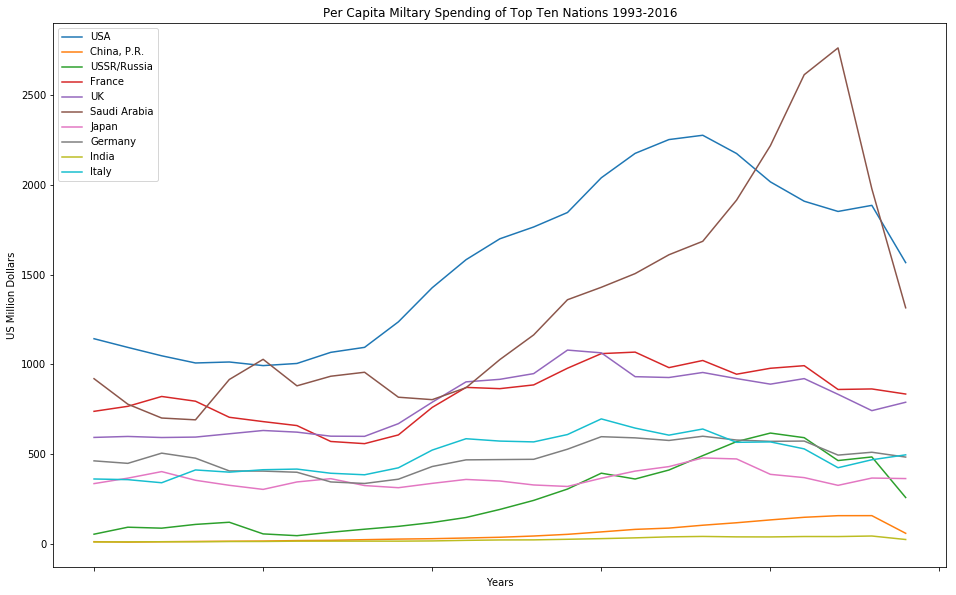

In [16]:
topten_Per_capita.T.plot(kind='line',figsize=(16,10))
plt.legend(loc='best') 
plt.xlabel('Years')
plt.ylabel('US Million Dollars')
plt.title('Per Capita Miltary Spending of Top Ten Nations 1993-2016')
plt.show()

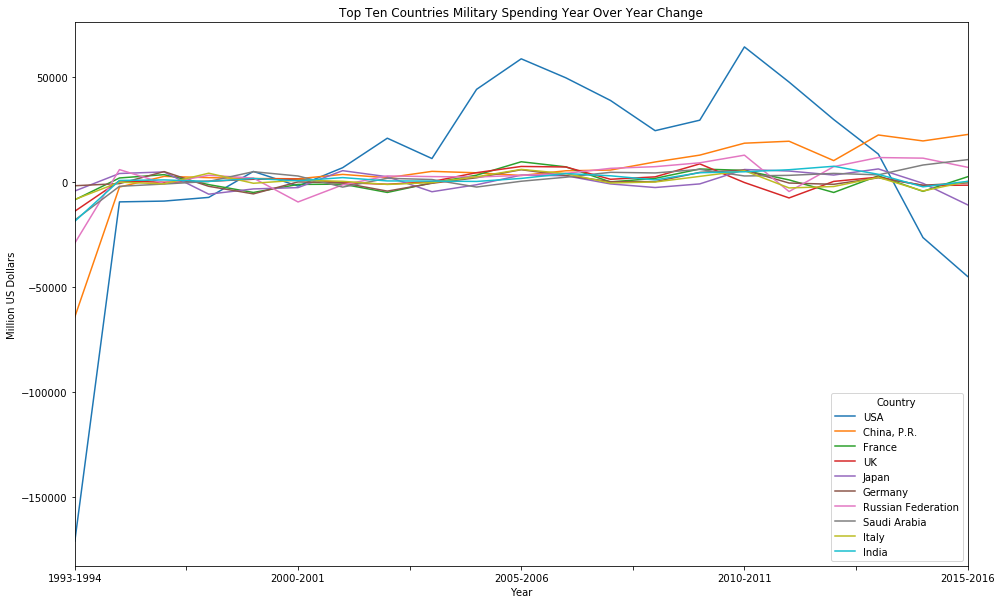

,1993-1994,1994-1995,1995-1996,1997-1998,1998-1999,2000-2001,2001-2002,2002-2003,2003-2004,2004-2005,...,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Average Change
Country,,,,,,,,,,,,,,,,,,,,,
USA,-171004.003417,-9578.000000,-9203.000000,-7439.000000,4908.000000,-2047.000000,6691.000000,20728.000000,11046.000000,43977.000000,...,38677.000000,24307.000000,29301.000000,64170.000000,47436.000000,29613.000000,13158.000000,-26558.000000,-45076.000000,8145.856980
"China, P.R.",-64303.864867,-2526.579371,2555.643040,1957.010791,1541.674841,1423.074637,3499.351373,1902.423365,4945.622677,4262.348366,...,5566.168477,9418.606056,12674.074559,18350.536884,19282.115414,10067.566540,22255.523228,19423.072951,22490.074112,4904.734312
Russian Federation,-29188.081599,5781.151655,-806.242263,3084.711181,1751.012529,-9621.622780,-1486.695190,2759.168932,2454.947201,2260.673719,...,6381.563703,7180.804345,9017.213377,12648.790397,-4651.668596,7188.110811,11517.296343,11231.875980,6883.496532,2447.528323
Saudi Arabia,-18239.496901,-2171.466667,-1079.466667,139.733333,4786.666667,2734.933333,-2541.600000,1644.266667,1062.400000,-2524.800000,...,4481.638601,4188.468742,5889.005666,2753.420325,3044.266667,3977.333333,3286.400000,7966.933333,10522.133333,1539.490624
India,-18820.027523,627.008645,873.913404,150.208106,1560.210654,455.727429,1974.951643,391.951779,313.128105,149.024905,...,2833.746399,879.615033,4302.845492,4747.603277,5719.777665,7368.291264,3543.370137,-2416.895745,186.608753,968.093271
France,-8587.037301,1801.639981,3375.597677,-1364.671416,-5095.186598,-1267.112305,-1143.899350,-5082.978308,-537.602307,3127.274216,...,-98.251826,1607.306994,6078.910018,5414.461280,874.580752,-5102.280771,2819.179112,-4565.773409,2381.945367,535.199502
UK,-14023.918901,407.642780,-245.700361,243.125703,1183.928878,1191.410489,-412.935844,-1198.538209,77.112561,4327.601763,...,1181.261357,2331.411486,8503.113983,-366.639177,-7704.822622,168.220937,2187.586892,-1774.778966,-1633.897132,416.759968
Germany,-1895.901637,-884.767593,4828.420578,-2168.818447,-5772.312724,-71.116868,-542.451419,-4454.014851,-724.732847,1907.949910,...,46.410332,38.360865,4459.469291,5529.592375,-611.370983,-1214.552141,1884.826756,-1669.477046,-540.330342,324.742229
Italy,-8426.100016,-202.429334,-988.281937,4066.827315,-718.181030,754.253769,215.706379,-1282.678667,-405.117757,2357.021736,...,-590.117546,-117.948285,2553.578777,5281.916037,-2942.229772,-2269.117924,2097.701984,-4397.237504,159.159979,233.325980


In [14]:
##Single out the fastest growing countries in military spending in fixed value and in percentage


#Graph change year over year
result = []
i =0
for i in range(21):
    current = topten_Current_USD.iloc[:,i]
    previous=topten_Current_USD.iloc[:,i-1]
    diff=current-previous
    --i
    result.append(diff)
result
diff_result=(pd.concat(result, axis=1))
#diff_result=diff_result.iloc[:,1:21]
diff_result.columns=['1993-1994','1994-1995','1995-1996','1997-1998','1998-1999','2000-2001','2001-2002','2002-2003','2003-2004','2004-2005', '2005-2006', '2006-2007', '2007-2008','2008-2009', '2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016']
diff_result.T.plot(kind='line', figsize=(16,10))
plt.legend.loc=("best")
plt.xlabel('Year')
plt.ylabel('Million US Dollars')
plt.title('Top Ten Countries Military Spending Year Over Year Change')
plt.show()

diff_result_mean = diff_result.copy(deep=True)
diff_result_mean['Average Change']=diff_result_mean.mean(axis=1)

#Sort according to order
sort_diff_result_mean=diff_result_mean.sort_values(by='Average Change', ascending = False)
sort_diff_result_mean

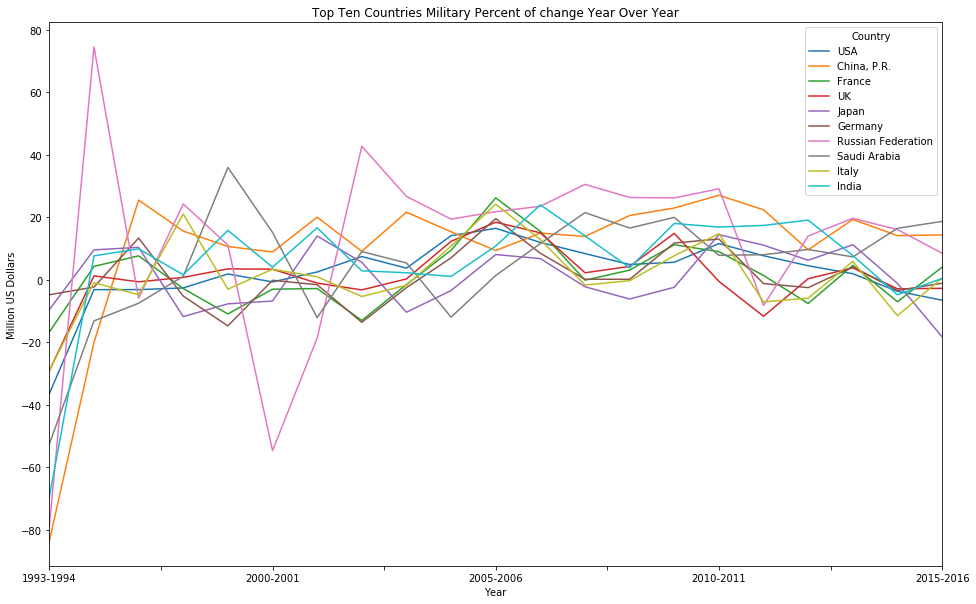

,1993-1994,1994-1995,1995-1996,1997-1998,1998-1999,2000-2001,2001-2002,2002-2003,2003-2004,2004-2005,...,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Average % Change
Country,,,,,,,,,,,,,,,,,,,,,
Russian Federation,-78.983191,74.434917,-5.951062,24.209707,11.063913,-54.738746,-18.687099,42.651939,26.602654,19.349862,...,30.453055,26.267734,26.123386,29.054305,-8.279379,13.948798,19.613848,15.991276,8.449180,11.750590
"China, P.R.",-83.640742,-20.088622,25.427800,15.524156,10.586070,8.836275,19.964362,9.047380,21.568572,15.290723,...,13.793790,20.511401,22.903234,26.981496,22.327057,9.529690,19.233585,14.078026,14.289358,10.016275
India,-69.514392,7.596843,9.840756,1.539891,15.752269,3.974985,16.567537,2.820697,2.191621,1.020674,...,14.001715,3.812427,17.964506,16.802836,17.331411,19.028619,7.687863,-4.869454,0.395216,5.647240
Saudi Arabia,-52.577488,-13.199442,-7.559432,1.058564,35.882059,15.087900,-12.183150,8.975255,5.321508,-12.007609,...,21.432582,16.495205,19.908400,7.762780,7.964503,9.638001,7.263640,16.416196,18.623948,5.103241
USA,-36.489339,-3.218014,-3.194832,-2.667685,1.808288,-0.740794,2.439496,7.377326,3.661289,14.061706,...,8.323434,4.829017,5.553008,11.521453,7.637036,4.429324,1.884614,-3.733528,-6.582552,2.152833
France,-16.778796,4.230108,7.603980,-2.856867,-10.980192,-3.067456,-2.856810,-13.067709,-1.589869,9.397801,...,-0.185356,3.037884,11.150674,8.935494,1.324933,-7.628549,4.563126,-7.067659,3.967584,1.414535
Italy,-29.063466,-0.984293,-4.853193,20.989798,-3.063640,3.319209,0.918753,-5.413548,-1.807659,10.710781,...,-1.729728,-0.351810,7.643582,14.687606,-7.133779,-5.924372,5.821728,-11.532228,0.471826,1.411737
UK,-29.149817,1.195929,-0.712309,0.709901,3.432578,3.339634,-1.120091,-3.287868,0.218729,12.248417,...,2.188725,4.227281,14.792404,-0.555631,-11.741675,0.290464,3.766322,-2.944692,-2.793194,1.306665
Germany,-4.847495,-2.377446,13.290346,-5.269404,-14.804641,-0.214094,-1.636529,-13.660944,-2.574540,6.956908,...,0.122108,0.100806,11.706984,12.994951,-1.271532,-2.558564,4.074815,-3.467937,-1.162729,1.110956


In [15]:
#Adjust Graph to display percent change year over year
perc_result = []
i =1
for i in range(21):
    current = topten_Current_USD.iloc[:,i]
    previous=topten_Current_USD.iloc[:,i-1]
    perc_diff= 100*((current-previous)/previous)
    --i
    perc_result.append(perc_diff)
perc_result
percdiff_result=(pd.concat(perc_result, axis=1))
percdiff_result.columns=['1993-1994','1994-1995','1995-1996','1997-1998','1998-1999','2000-2001','2001-2002','2002-2003','2003-2004','2004-2005', '2005-2006', '2006-2007', '2007-2008','2008-2009', '2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016']
percdiff_result.T.plot(kind='line', figsize=(16,10))
plt.legend.loc=("best")
plt.xlabel('Year')
plt.ylabel('Million US Dollars')
plt.title('Top Ten Countries Military Percent of change Year Over Year')
plt.show()

percdiff_result_mean = percdiff_result.copy(deep=True)
percdiff_result_mean['Average % Change']=percdiff_result_mean.mean(axis=1)

#Sort according to order
sort_percdiff_result_mean=percdiff_result_mean.sort_values(by='Average % Change', ascending = False)
sort_percdiff_result_mean